In [1]:
import os
import sys
import numpy as np
from scipy import signal as scipysig
from matplotlib import pyplot as plt

In [2]:
ROOT = ROOT = 'C:\\OneDrive - Netherlands eScience Center\\Project_ePodium\\time_series_generator'
sys.path.insert(0, ROOT)

import TS_generator as TSgen

# General workflow:
## 1) Import time series classes from yaml files

In [3]:
PATH_classes = os.path.join(ROOT, 'TS_types')
filename = os.path.join(PATH_classes, 'TS_type_test002.yaml')

TS_def = TSgen.load_TS_class(filename)

Test_2
Part of a test dataset to test classifiers. Contains three peaks roughly at the same time (later time).

n_channels: 10
n_timepoints: 400


In [4]:
TS_def

{'class_name': 'Test_2',
 'description': 'Part of a test dataset to test classifiers. Contains three peaks roughly at the same time (later time).\n',
 'class_creator': 'Florian Huber',
 'last_updated': '05-03-2020',
 'n_channels': 10,
 'n_timepoints': 400,
 'noise_description': 'Combination of gaussian noise and random walker.\n',
 'noise_defs': [{'channels': 'all',
   'noise_amp': [0.05, 0.06],
   'noise_type': 'gaussian'},
  {'channels': 'all',
   'noise_amp': [0.018, 0.022],
   'noise_type': 'random_walk'}],
 'shape_description': 'No overall shape added.\n',
 'signal_description': 'Three peaks in the first four channels. Of various width and position. But all three peaks will be at near identical time position. \n',
 'signal_defs': [{'amp': [0.7, 1],
   'channels': [0, 1, 2, 3],
   'extra_shift': [-8, 8],
   'length': [70, 90],
   'n_ch': 3,
   'peaks_per_ch': 1,
   'position': [240, 340],
   'sign': 1,
   'signal_type': 'peak_exponential'}]}

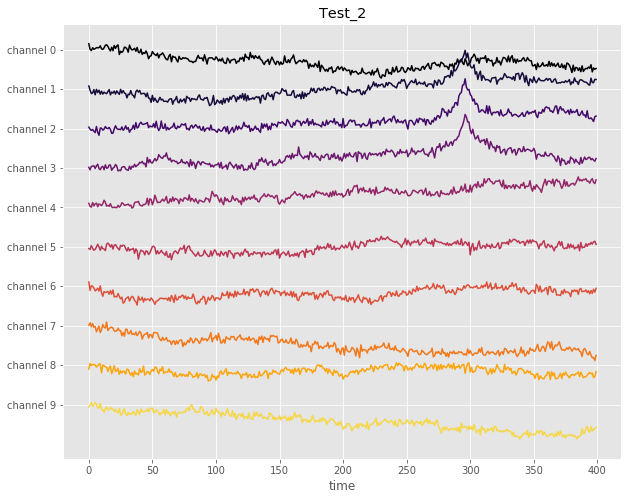

In [11]:
X = TSgen.generate_TS(TS_def,
                    random_seed = None)

TSgen.plot_TS(X, TS_def)

## Generate entire data set

In [6]:
TS_classes = []
for filename in ['TS_type_test000.yaml', 'TS_type_test001.yaml', 'TS_type_test002.yaml', 'TS_type_test003.yaml']:
    TS_classes.append(os.path.join(PATH_classes, filename))

In [7]:
X_data, y_data = TSgen.generate_dataset(TS_classes,
                                      200,
                                      random_seed = None)

Test_0
Part of a test dataset to test classifiers. This one is the no-signal baseline only containing noise.

n_channels: 10
n_timepoints: 400
Test_1
Part of a test dataset to test classifiers. Contains three peaks roughly at the same time.

n_channels: 10
n_timepoints: 400
Test_2
Part of a test dataset to test classifiers. Contains three peaks roughly at the same time (later time).

n_channels: 10
n_timepoints: 400
Test_3
Part of a test dataset to test classifiers. Contains three gaussian signals at different positions.

n_channels: 10
n_timepoints: 400


In [8]:
X_data.shape

(800, 10, 400)

In [9]:
list(set(y_data))

['Test_1', 'Test_3', 'Test_2', 'Test_0']

In [10]:
y_data[:10]

['Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0']